<a href="https://colab.research.google.com/github/AhmedGhwell/streamlit-example/blob/master/Loan_prediction_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries needed
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('loan_prediction_data.csv')

Data is preprocessed. encoded categorical variables, normalized, filling missed values with mean/median for numerical and mode for categorical. Prepared to be fed to our architecture.

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
data.isnull().sum() # no more missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# now we need to remove loan ID from the data since it is not a predictor
data = data.drop('Loan_ID',axis = 1)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
# defining the dependent variable
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [ ]:
# creating train/test sets with 80:20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [ ]:
# NOW WE DEFINE OUR MODEL ARCHITECHTURE

In [ ]:
our architecture basically looks like this:
                               ___________           ______________        ____________________
inputs and inputs layer -----> |first layer| ------> |second layer| ------>| third/output layer|

In [ ]:
import keras
import tensorflow as tf

In [ ]:
from keras.models import Sequential # This line is what will construct our model thats shown by the block diagram


In [ ]:
# now we will define the input layer and the dense layers that include hidden and output layers
from keras.layers import InputLayer, Dense

In [ ]:
# the number of neurons at the input layer should be equal to the number of features/attributes we have. eg; our predictors
# so it should be equal to X_train.shape
input_neurons = X_train.shape[1]

In [ ]:
# for the output layer, we need only one neuron since our problem is a classification(binary) problem
output_neurons  = 1

In [ ]:
# as for the hidden layers our hyperparameters are free to us to choose
number_of_hidden_layers = 2 # we defined 2
layer1_neurons = 10
layer2_neurons = 5

In [ ]:
# what we have left are the optimizer and activation functions
# the activation functions will be relu for the hidden layers and sigmoid for the output layer
# sigmoid is good for non-linear binary classification. We can use tanh as well
# now we cascade the components to have our DNN
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=layer1_neurons,activation='relu'))
model.add(Dense(units=layer2_neurons,activation='relu'))
model.add(Dense(units=output_neurons,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# after the construction of the network, we compile it and define the optimizer and the loss function
# Adam optimizer is used, and SGD can also be used.
# loss function eg; our error determination criteria is binary crossentropy(log loss)
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# training phase
model_history= model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 1s 31ms/step - loss: 0.6583 - accuracy: 0.6904 - val_loss: 0.6581 - val_accuracy: 0.6911
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6444 - accuracy: 0.6864 - val_loss: 0.6445 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6295 - accuracy: 0.6864 - val_loss: 0.6329 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.6864 - val_loss: 0.6228 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6066 - accuracy: 0.6864 - val_loss: 0.6143 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5983 - accuracy: 0.6864 - val_loss: 0.6090 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.6864 - val_loss: 0.6045 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

In [ ]:
# prediction of actual values for validation
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

4/4 [==============================] - 0s 2ms/step


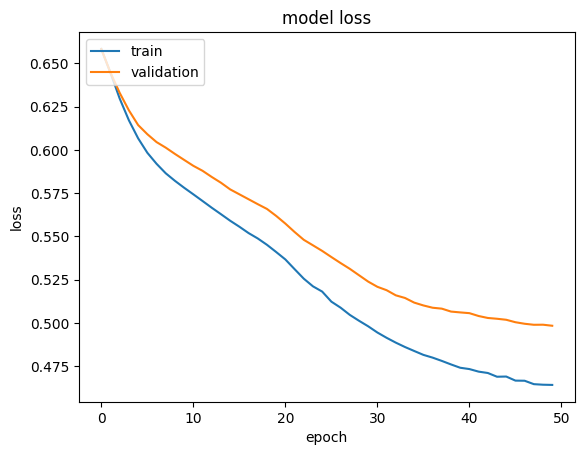

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'validation'],loc='upper left')
plt.show()

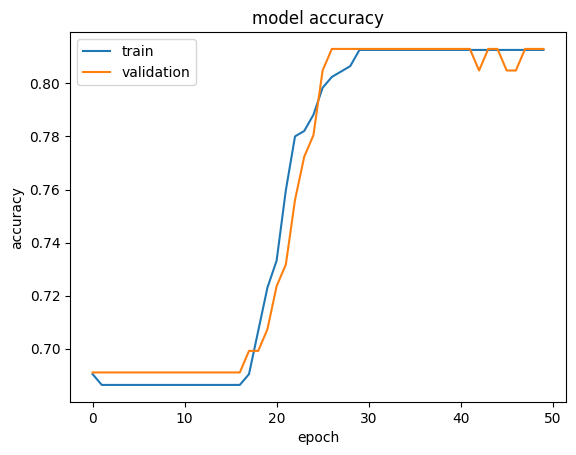

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()